---
# A/B Testing 
Lets think about the following scenario:
* you run a software-as-a-service startup 
* have a landing page where you get people to signup
* "Signup" = enter email address and click signup button
* Not everyone who visits your site will sign up
* Conversion rate = proportion of people who sign up 

#### Now lets suppose that your lead marketer has identified problems with your landing page (not responsive, slow load time, bad copy, etc)...
* They create a new, possibly better page
* you as a data scientist, want to measure which page is better, using data and math
* Recall confidence interval concept
* Why did we talk about confidence intervals? Because we knew intuitively that 1/10 is not as accurate as 10/100, which is not as accurate as 100/1000 (even though these all yield the same click rate/conversion rate)
* Because of this, even if page1 gets 1/10 clicks, and page2 gets 2/10 clicks, it is not necessarily worse! 
* However, if page1 gets 10/100 clicks, and page2 gets 20/100 clicks, now we are more certain that page2 is superior
* But again, **how can we quantify this?**

#### In Frequentist statistics
* the answer is to do a traditional statistical test 
* we are going to set up a simple example to get familiar with the terminology, and dive further into detail later on 

## Our example: Are men taller than women?
* In a statistical test you would say: "is the difference in height between men and women statistically significant"
* there is that term signficance again, which we first saw with confidence intervals! Recall we used $\alpha$ to represent it
* we will again use 5%, which is a standard significance level researchers use (1% is also common)
* This highlights a weakness of the method though! We still need to choose a threshold for what we deem to be significant
* To be even more precise, "is the difference in height between men and women statistically significant, at significance level $\alpha$?"

## Hypotheses 
So in statistical testing we have two hypotheses:
* **Null Hypothesis (no difference):**
    * example: no significant difference in mean height between men and women
    * example: no difference in effect between drug and placebo
### $$H_0:\mu_1 = \mu2$$
* **Alternative Hypothesis (one sided test):**
### $$H_1:\mu_1 > \mu2$$
* **Alternative Hypothesis (two sided test):**
    * example: test if men taller than women OR women taller than men
    * example: test if drug works better than placebo or worse than placebo
### $$H_1:\mu_1 \neq \mu2$$

We are going to be doing the two sided test! In other words, our alternative hypothesis will be that the average height of men is not equal to the average height of women. 

---
# Simple A/B Testing Recipe
Continuing with our example of height of men vs women, or drug vs placebo...
* As is typical in frequentist statistics, we will assume data is Gaussian-distributed
* we collected some data, 2 lists of heights- one for men and one for women
### $$x_1 = \{x_{11}, x_{12},...,x_{1N}\}$$
### $$x_2 = \{x_{21}, x_{22},...,x_{2N}\}$$
* we then create a "test statistic" called "t"

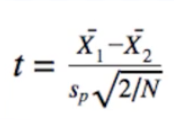

where:

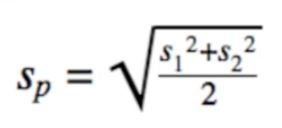

* $s_p$ is the pooled standard deviation (use unbiased estimates for all s - divide by N-1, not N)
* N = size of EACH group (if you have 10 men and 10 women, N = 10)

#### Now lets think back to when we looked at the estimate of a mean...
* it was a sum of random variables, and therefore also a random variable (with a gaussian distribution)
* t is also a function of random variables, therefore also a random variable (note, formally a random variable is a *Function*)
* it can be shown that since t is a random variable, it is **t-distributed**
* we will see t-distribution and other more exotic distributions a lot when studying statistical testing + bayesian methods

## t-distribution
* Looks like a gaussian with fatter tails
* this means that there is more probability weight on the tail ends, compared to the gaussian
* 
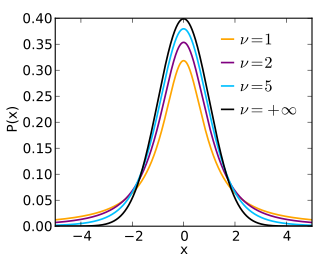

The PDF for the t-distribution looks like: 

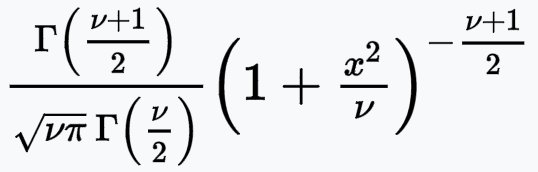

* we will no use it directly in this course
* it has 1 parameter: $\nu$ = the degrees of freedom
* similar to gaussian, it has a mean and scale parameter (but we won't use it)
    * not shown in wikipedia
    * but scipy takes it in as args
* for our statistical test, $\nu$ = 2N -2

## Test Statistic

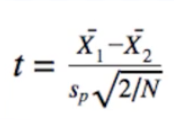

* if mean(X1) = mean(X2) then t = 0
    * this falls in the center of the t distribution
* if mean(X1) >> mean(X2) then t = large #
    * falls in right tail
* if mean(X1) << mean(X2) then t = small # 
    * falls in left tail
* symmetry: doesn't matter if we call men = 1, women = 2, or vice versa 

## Area under t-distribtution
* similar to the problem of finding a confidence interval, we want to find the area under the curve of the t-distribution, so we will need the CDF (use scipy.stats.t.cdf)
* Also remember there are 2 tails of the distribution that we need to consider
    * left - CDF area will be very close to 0
    * right - CDF area will be very close to 1
* so for a significance level $\alpha$ = 0.05, t < -2.776 or t > 2.776
* we call that "statistically significant" difference 

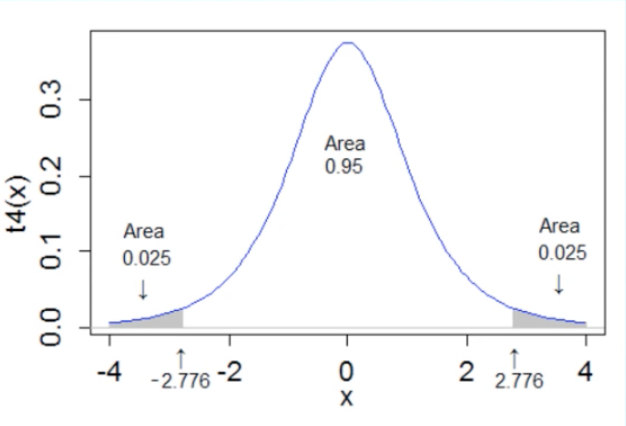

## And we are done! (almost)
* not the whole story in terms of statistics terminology
* algorithmically, we are done - we know how to show statistical significance 

---
# p-values
We just went over an algorithm to determine whether the difference between two groups was statistically significant or not. Well the algorithm is done, but we need some more terminology. In stats, we are looking for one number, which should be very small regardless of which tail we are one. 

## Why are we looking for this very small number?
* What is this small number called? It is called a **p-value**!
* there is a lot of controversy over its use
* Definition: **the probability of obtaining a result equal to or 'more extreme' than what was actually observed, when the null hypothesis is true**

## Rephrase for our example
* If average height of men == average height of women (null hypothesis)
* Then: p-value is the probability of observing the difference we measured (or any larger difference) 
* in other words, if t value (which is proportional to mean(X1) - mean(X2), or mean(X1) - mean(X2) is very large, p-value should be very small 
* Now, we want to keep using our significance level, $\alpha$ = 0.05
* so if p-value < $\alpha$, the difference is statistically significant, and we **reject** the null hypothesis
* otherwise, we CANNOT reject the null hypothesis 
* Note: this does not mean the null hypothesis is true, it just means that we cannot reject it with the data we have collected

## So for our example...
* we want the p-value < 5% = 0.05 
* but the answer we got before (for statistical significance) was: Area < 0.025 OR Area >0.975
* If we get Area > 0.975, take 1 - Area < 0.025
* Now we have  *small number* < 0.025
* multiply by sides by 2
* 2(*small number*) < 0.05
* P-value = 2*small_number = 2*(1-Area)

# Test Characteristics, Assumptions, and Modifications
Lets look at the formula for our test statistic again:

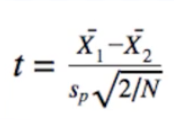

* We already know that if mean(X1) >> mean(X2) or vice versa, t will be larger
* But what about $s_p$ and N?
* t $\propto$ (proportional) $\frac{\sqrt{N}}{s_p}$ 
* this is interesting because it tells us that a larger N leads to a bigger t statistic, *and subsequently* a smaller **p-value**

### Buy why is that reallyy important...?
Well, even if mean(X1) and mean(X2) remain fixed, the significance, a Large N may lead to a significant difference, but a small N may not! 

## Look at Standard deviation 
* bigger $s_p$ leads to a smaller t, and a larger p-value
* in other words if the variance of the two groups is large, it will be harder to find a statistically significant difference 
* there will be too much overlap between the two groups, seen below: 

#### high standard deviation, a lot of overlap, hard to find statistical difference

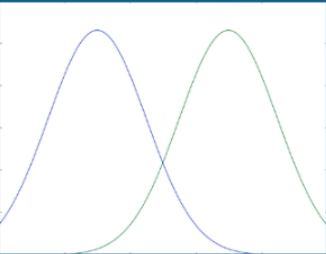

#### low standard deviation, low overlap, easier to find statistical difference

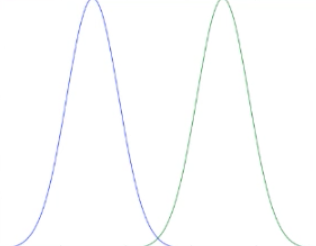

## standard deviation vs N
* the test statistic is proportional to $\frac{\sqrt{N}}{s_p}$ 
* this leads to the same situation as the confidence interval
* t grows slowly (square root) with N
* t decreases faster (inversly proportional) with $s_p$

## "Small" Sample sizes? 
* people in online forums often make comments like: 
> "This study *only* has 20 participants, it's a garbage result!"
* Now that you know how the t-statistic is calculated, can you see what logic doesn't follow!?
* **t depends on N** if N is small, t is smaller, and the p-value is bigger
* since statistical significance is a function of N, it already takes sample size into account!
* Therefore it is not correct to say that a small value of N makes a finding "false"!

## Pooled Standard deviation
* Recall: N is the size of EACH group
* What if each group is of a different size? Take a weighted combination

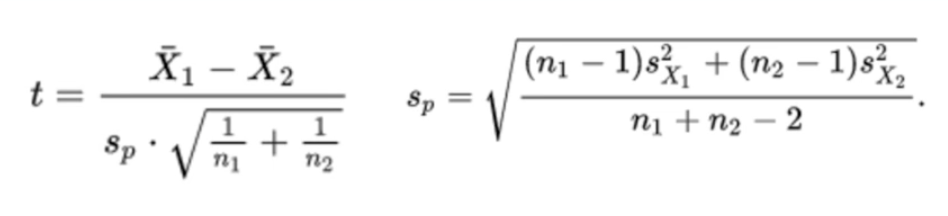

## Another Assumption
* It may not be obvious, but we've assumed that the standard deviation of both groups is the same
* That seems like a pretty strong assumption...
* So there is a modification called **Welch's t-test** that does not make this assumption
* The important thing though is that the steps are the same!
> * find the t statistic
  * find the degrees of freedom
  * calculate the p-value to see if it is significant

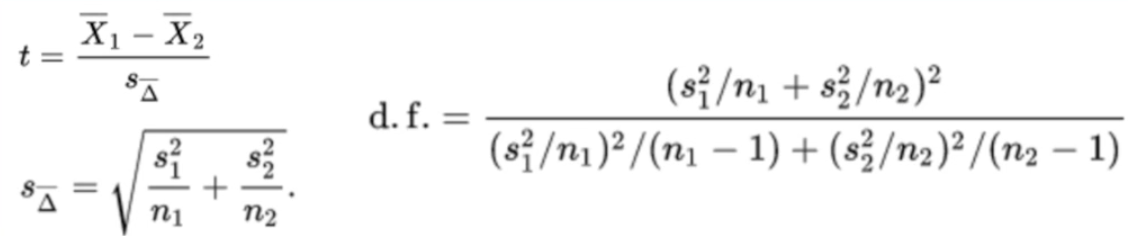

## More assumptions
* we assumed the data was gaussian
* However, a lot of data, including the click through data, is not gaussian (we will see what type of test to use on click data in a later lecture)
* What is we don't want to assume a distribution/don't know what distribution our data comes from?
* There a tests called "non parametric tests"/"distribution free tests" 
* some popular ones are (check scipy):
    * Kolmogorov-Smirnov test
    * Kruskal-Wallis test
    * Mann-Whitney U test
* "API" is the same (similar to how all SKLearn models have fit/predict) 
* less assumptions -> less power -> need "more extreme" difference for statisically significant p-value (remember 1 vs 2 sided test) 

## 1-sided vs 2-sided tests 
* we did not make the 1-sided assumption (even though we already know men are taller than women on average) 
* Effect of 1-sided test on p-value: it's "easier" to show significance because you don't have to multiply area by 2
* sometimes you don't want to do a 1-sided test
> * example: drug testing 
  * you want to test if a drug is better, and also if a drug is worse. 
  * But if you have an effective drug, and you want to test if a new drug is better, you can use a 1-sided test 
  
## Summary
* The point of this process was to show a simple example of how frequentist statistical testing works
> * we generated a test statistic
  * from that we know its distribution
  * look to see if it's at the "extreme" values of the distribution (statistical significance)
  * if it is statistically significant, reject the null hypothesis

---
# t-test in code

### start with our imports

In [83]:
import numpy as np
from scipy import stats

### Generate some data
We will generate 10 data points for each group. `a` is going to be equal to gaussian distributed data of size `N`, with a mean of `2`. Note: here we are using numpy's `random` module, which has a function `randn` that returns a sample from the standard normal distribution. For more info use `shift+tab`. 

In [84]:
N = 10
mean_a = 2
a = np.random.randn(N) + mean_a

`b` is going to be same thing, but with a mean of 0.

In [85]:
mean_b = 0 
b = np.random.randn(N) + mean_b

Note: both `a` and `b` have a variance of 1.

## Create our own t-test
* so we are going to calculate the variance of `a`
* by default numpy does the MLE of the variance (this can be done because we know the mean), which is dividing by `N`
* however, we want to unbiased estimate, that divides by `N-1`
* we do the same thing for variance of `b`

In [86]:
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

### Calculate pooled standard deviation

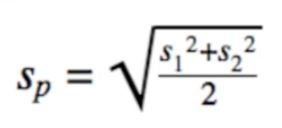

In [87]:
s = np.sqrt( (var_a + var_b)/2 )

### Calculate t-statistic

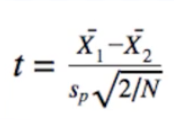

In [88]:
t = (a.mean() - b.mean())/ (s * np.sqrt(2/N) )

### Calculate the degrees of freedom
We need the degrees of freedom so that we can pass it in to the t-distribution CDF: 

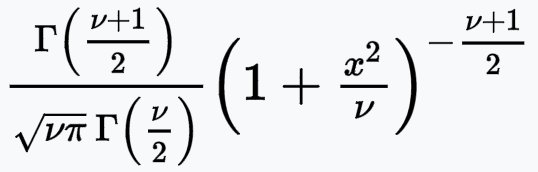

* When dealing with one sample, the degrees of freedom is equal to `N-1`. 
* However, in the case where we have two samples, `a` and `b`, there are two `N's` to consider, so the degrees of freedom is:
### $$df = (N_1-1)+(N_2-1)$$
in our case that is:
### $$df = 2N - 2 $$

In [123]:
df = 2*N - 2

### Now that we have the t statistic and df...
Lets look at where our t statistic lies on the t distribution

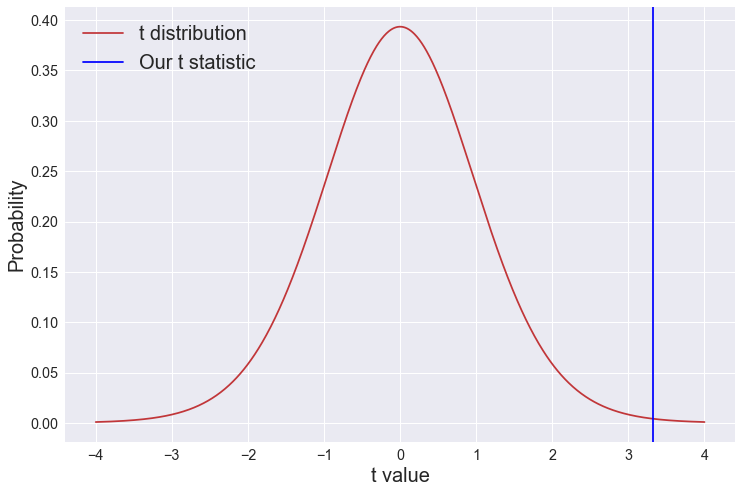

In [127]:
# imports needed for plots
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
import seaborn as sns
%matplotlib inline 

# ---------------plotting t dist and our t statistic -------------

# styling
sns.set(style="darkgrid", palette="RdBu")
fig, ax = plt.subplots(figsize=(12,8))

# plotting distribution
x = np.linspace(-4, 4, 1000)
plt.plot(x, stats.t.pdf(x, df))

# plotting t value
plt.axvline(x=t, color="blue")

# setting axes
ax.set_xlabel('t value', fontsize=20)
ax.set_ylabel('Probability', fontsize=20)
ax.tick_params(labelsize="large")
ax.legend(['t distribution', 'Our t statistic'], fontsize=20)

plt.show()

### The p-value - the area to the right of our t statistic
* here we use the t-distribution CDF from the formula above
* we are trying to find the area under the curve to the right of our t statistic
* lets zoom in on our plot from above to find the exact area we are looking for (remember in a continuous probabilty function, there is not probability for a specific point, so we must look for an interval. In this case we will find the probability that we would have observed the values we did *if the null hypothesis was true*, which is the area under the distribution to the right of our t value)

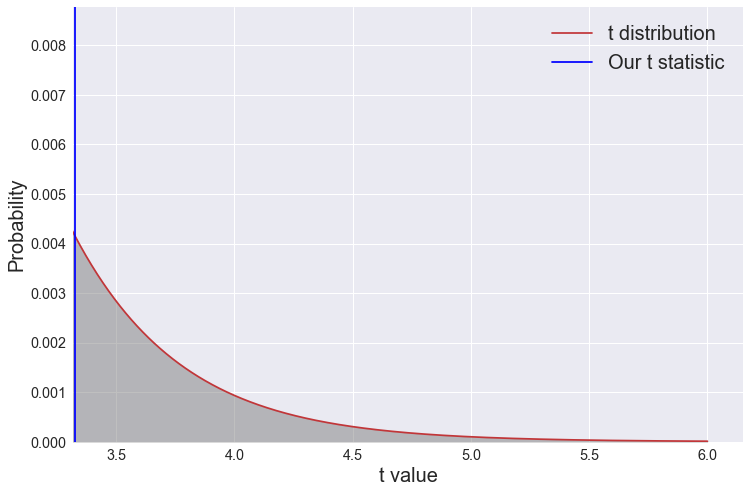

In [154]:
# ---------------zooming in on t dist and our t statistic -------------

# styling
sns.set(style="darkgrid", palette="RdBu")
fig, ax = plt.subplots(figsize=(12,8))

# plotting t distribution
x = np.linspace(3, 6, 1000)
y1 = stats.t.pdf(x, df)
plt.plot(x, y1)

# plotting t value
plt.axvline(x=t, color="blue")

# setting limits so that the area we are finding can be shaded
plt.xlim(t-.005)
plt.ylim(0)
y0 = 0

# shading the area based on limits
plt.fill_between(x, y1, y0, color='grey', alpha='0.5')

# setting axes
ax.set_xlabel('t value', fontsize=20)
ax.set_ylabel('Probability', fontsize=20)
ax.tick_params(labelsize="large")
ax.legend(['t distribution', 'Our t statistic'], fontsize=20)

plt.show()

### Calculate the p-value
* scipy has a stats module that gives us access to a Student’s T continuous random variable.
* we use its `cdf` method in order to calculate how much of the area under the curve lies after our t-statistic 

In [155]:
p = 1 - stats.t.cdf(t, df=df)
print("t:", t,"\tp:", 2*p)

t: 3.32400681262 	p: 0.00377573607453


### Compare with built in scipy function

In [156]:
t2, p2 = stats.ttest_ind(a,b)
print("t2:", t2,"\tp2:", p2)

t2: 3.32400681262 	p2: 0.00377573607453
